In [1]:
library(grf)

In [2]:
n_obs <- 1000
n_X <- 5
n_X0 <- 5
X <- matrix(rnorm(n_obs * (n_X + n_X0)), n_obs, (n_X + n_X0))
theta <- log(abs(X[, 1]) * abs(X[, 2])) - 1 / (1 + abs(X[, 3])) + 2 * X[, 4] + exp(0.1 * X[, 5])

D <- rnorm(n_obs)

y <- D * theta + 2 * rnorm(n_obs)

In [ ]:
num.trees = 100

In [6]:
fit_grf <- causal_forest(X, y, D, num.trees = num.trees)

In [7]:
n_sim <- 1000
mse_mat <- matrix(0, n_sim, 1)
pb <- txtProgressBar(min = 0, max = n_sim, style = 3)
for (s in 1:n_sim) {
    # Random permutation
    smpl_s <- sample(c(1:n_obs), replace = FALSE)
    X_s <- X[smpl_s, ]
    # Estimate grf
    fit_grf_s <- causal_forest(X_s, y, D, num.trees = num.trees)
    # Calculate mean squared error
    mse_mat[s] <- mean((y - predict(fit_grf_s)$predictions * D)^2)
    # Update progress bar
    setTxtProgressBar(pb, s)
}#FOR

  |======================================================================| 100%

In [8]:
fit_grf <- causal_forest(X, y, D)

In [9]:
mse_0 <- mean((y - predict(fit_grf)$predictions * D)^2)

In [10]:
mean(mse_0 >= mse_mat)

[1] 0

In [11]:
mse_0

[1] 6.320787

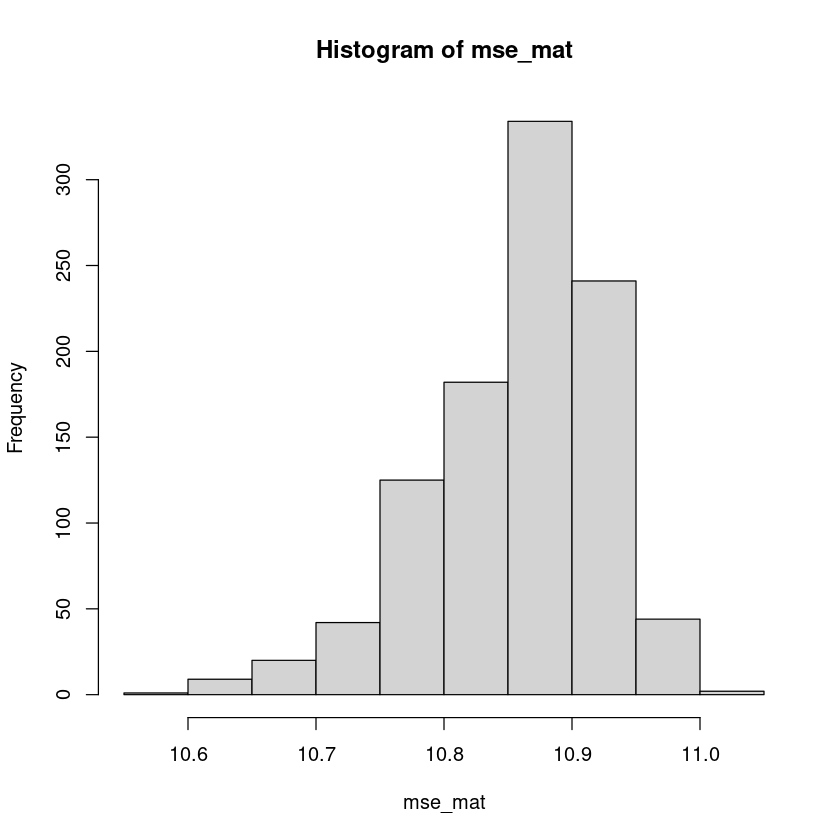

In [12]:
hist(mse_mat)